In [4]:
# prompt: read dataset wich is csv type

import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your CSV file
# If the file is uploaded to Colab, you can use the file name directly
df = pd.read_csv('C:/Users/Dhruv/OneDrive/Desktop/TDL_Project/passes_data.csv')

# Print the first 5 rows of the DataFrame
print(df.head())


       x     y  pass_end_x  pass_end_y  pass_angle  pass_length  \
0  117.7  60.6       108.1        31.2   -1.886412    30.927658   
1   88.8  31.7       104.3        20.5   -0.625721    19.123022   
2   87.4  71.3       106.1        43.5   -0.978655    33.504177   
3  120.0  80.0       109.0        41.7   -1.850475    39.848340   
4  107.8  26.5       100.1        29.6    2.758849     8.300602   

  pass_technique  pass_type    play_pattern  under_pressure  \
0         Normal  Open Play    Regular Play           False   
1         Normal  Open Play    Regular Play           False   
2         Normal  Open Play  From Free Kick           False   
3    Outswinging     Corner     From Corner           False   
4         Normal  Open Play  From Free Kick           False   

   possession_team_id  shot_statsbomb_xg_y  
0                 175             0.087901  
1                 181             0.074020  
2                 181             0.056902  
3                 181             0.04

In [5]:

if 'possession_team_id' in df.columns:
  df = df.drop('possession_team_id', axis=1)

# Print the ranges of the values for the first 6 columns
for i in range(min(6, len(df.columns))):
  column_name = df.columns[i]
  print(f"Column: {column_name}")
  print(f"  Min: {df[column_name].min()}")
  print(f"  Max: {df[column_name].max()}")
  print(f"  Range: {df[column_name].max() - df[column_name].min()}")
  print("---")


Column: x
  Min: 5.8
  Max: 120.0
  Range: 114.2
---
Column: y
  Min: 0.1
  Max: 80.0
  Range: 79.9
---
Column: pass_end_x
  Min: 31.9
  Max: 119.2
  Range: 87.30000000000001
---
Column: pass_end_y
  Min: 0.1
  Max: 79.0
  Range: 78.9
---
Column: pass_angle
  Min: -3.122727
  Max: 3.1415927
  Range: 6.2643197
---
Column: pass_length
  Min: 0.3
  Max: 98.09842
  Range: 97.79842000000001
---


In [6]:
df.columns

Index(['x', 'y', 'pass_end_x', 'pass_end_y', 'pass_angle', 'pass_length',
       'pass_technique', 'pass_type', 'play_pattern', 'under_pressure',
       'shot_statsbomb_xg_y'],
      dtype='object')

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 🚀 Step 1: Feature Engineering - Calculate Pass Direction
df['pass_direction'] = np.arctan2(df['pass_end_y'] - df['y'], df['pass_end_x'] - df['x'])

# 🚀 Step 2: Remove Outliers using IQR Method
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Select only numerical columns
num_cols = ['x', 'y', 'pass_end_x', 'pass_end_y', 'pass_length', 'pass_angle', 'pass_direction']
df_cleaned = remove_outliers_iqr(df, num_cols)

# 🚀 Step 3: Min-Max Scaling (0 to 1)
scaler = MinMaxScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])


In [8]:
df_cleaned

,x,y,pass_end_x,pass_end_y,pass_angle,pass_length,pass_technique,pass_type,play_pattern,under_pressure,shot_statsbomb_xg_y,pass_direction
0,0.967832,0.757196,0.761290,0.362761,0.197358,0.469182,Normal,Open Play,Regular Play,False,0.087901,0.197358
1,0.563636,0.395494,0.679570,0.191011,0.398608,0.288348,Normal,Open Play,Regular Play,False,0.074020,0.398608
2,0.544056,0.891114,0.718280,0.560193,0.342267,0.508652,Normal,Open Play,From Free Kick,False,0.056902,0.342267
3,1.000000,1.000000,0.780645,0.531300,0.203095,0.605837,Outswinging,Corner,From Corner,False,0.042032,0.203095
4,0.829371,0.330413,0.589247,0.337079,0.938901,0.122560,Normal,Open Play,From Free Kick,False,0.040377,0.938901
...,...,...,...,...,...,...,...,...,...,...,...,...
5008,0.520280,0.568210,0.578495,0.833066,0.629944,0.308679,Normal,Open Play,Regular Play,False,0.019397,0.629944
5009,0.545455,0.894869,0.253763,0.871589,0.194733,0.136380,Normal,Open Play,From Kick Off,False,0.005246,0.194733
5010,0.902098,0.884856,0.668817,0.454254,0.205438,0.533499,Normal,Open Play,Regular Play,False,0.125753,0.205438
5011,0.555245,0.325407,0.546237,0.208668,0.430390,0.161994,Normal,Open Play,From Throw In,True,0.028587,0.430390


In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 🚀 One-Hot Encoding with dense output
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output for scikit-learn 1.2+
encoded_cols = encoder.fit_transform(df_cleaned[['pass_technique', 'pass_type', 'play_pattern']])

# Convert back to DataFrame with correct column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['pass_technique', 'pass_type', 'play_pattern']))

# Reset index to ensure proper merging
encoded_df.reset_index(drop=True, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

# Concatenating with original dataset (keeping all columns)
df_final = pd.concat([df_cleaned.drop(columns=['pass_technique', 'pass_type', 'play_pattern']), encoded_df], axis=1)

# Display processed DataFrame
print(df_final.head())



          x         y  pass_end_x  pass_end_y  pass_angle  pass_length  \
0  0.967832  0.757196    0.761290    0.362761    0.197358     0.469182   
1  0.563636  0.395494    0.679570    0.191011    0.398608     0.288348   
2  0.544056  0.891114    0.718280    0.560193    0.342267     0.508652   
3  1.000000  1.000000    0.780645    0.531300    0.203095     0.605837   
4  0.829371  0.330413    0.589247    0.337079    0.938901     0.122560   

   under_pressure  shot_statsbomb_xg_y  pass_direction  \
0           False             0.087901        0.197358   
1           False             0.074020        0.398608   
2           False             0.056902        0.342267   
3           False             0.042032        0.203095   
4           False             0.040377        0.938901   

   pass_technique_Inswinging  ...  pass_type_Throw-in  \
0                        0.0  ...                 0.0   
1                        0.0  ...                 0.0   
2                        0.0  ...  

In [10]:
from sklearn.decomposition import PCA

# Apply PCA to only the one-hot encoded features (e.g., 'pass_technique', 'pass_type', 'play_pattern')
categorical_features = [col for col in df_final.columns if col.startswith(('pass_technique_', 'pass_type_', 'play_pattern_'))]
pca = PCA(n_components=3)  # Reduce to 3 dimensions
categorical_pca = pca.fit_transform(df_final[categorical_features])

# Convert PCA-transformed features back to DataFrame
categorical_pca_df = pd.DataFrame(categorical_pca, columns=[f'pca_{i}' for i in range(3)])

# Merge back with numerical features
df_cluster = pd.concat([df_final.drop(columns=categorical_features), categorical_pca_df], axis=1)


In [11]:
df_final=df_cluster.copy()

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 🚀 Step 1: Select features for clustering
features = df_final.drop(columns=['shot_statsbomb_xg_y'])  # Exclude target (xG)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Standardizing for DBSCAN

# 🚀 Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)  # Tune eps & min_samples based on your dataset
df_final['pass_cluster'] = dbscan.fit_predict(features_scaled)

# 🚀 Step 3: Remove noise points (DBSCAN assigns -1 to noise)
df_final = df_final[df_final['pass_cluster'] != -1]

# 🚀 Display cluster distribution
print(df_final['pass_cluster'].value_counts())

# 🚀 Display dataset with clusters
print(df_final[['pass_cluster']].head())


pass_cluster
1    2235
0    1232
2     341
4     278
3     176
5     155
6      10
Name: count, dtype: int64
   pass_cluster
0             0
1             0
2             1
3             2
4             1


In [13]:
import pandas as pd

# Step 1: Compute the mean xG per cluster
cluster_mean_xA = df_final.groupby("pass_cluster")["shot_statsbomb_xg_y"].mean()

# Step 2: Map the cluster mean xG back to the dataset
df_final["cluster_xA"] = df_final["pass_cluster"].map(cluster_mean_xA)

# Step 3: Compute Individual Contribution (pass length as a weighting factor)
df_final["max_pass_length_per_cluster"] = df_final.groupby("pass_cluster")["pass_length"].transform("max")

# Avoid division by zero in rare cases
df_final["individual_contribution"] = (df_final["pass_length"] / df_final["max_pass_length_per_cluster"]) * df_final["shot_statsbomb_xg_y"]
df_final["individual_contribution"].fillna(0, inplace=True)  # Handle NaN values

# Step 4: Compute Final pseudo_xA (Weighted sum of cluster mean and individual contribution)
alpha = 0.7  # Weight factor (Adjustable: Higher α means more reliance on clusters)
df_final["pseudo_xA"] = (alpha * df_final["cluster_xA"]) + ((1 - alpha) * df_final["individual_contribution"])
df_final["pseudo_xA"] = df_final["pseudo_xA"] / df_final["pseudo_xA"].max() * df_final["shot_statsbomb_xg_y"].max()

# Drop helper columns if not needed
df_final.drop(columns=["cluster_xA", "max_pass_length_per_cluster", "individual_contribution"], inplace=True)

# Display result
print(df_final[["pass_cluster", "pseudo_xA"]].head())


   pass_cluster  pseudo_xA
0             0   0.359189
1             0   0.328971
2             1   0.330511
3             2   0.260159
4             1   0.295111


C:\Users\Dhruv\AppData\Local\Temp\ipykernel_20188\3873547684.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["individual_contribution"].fillna(0, inplace=True)  # Handle NaN values


In [14]:
df_final.columns


Index(['x', 'y', 'pass_end_x', 'pass_end_y', 'pass_angle', 'pass_length',
       'under_pressure', 'shot_statsbomb_xg_y', 'pass_direction', 'pca_0',
       'pca_1', 'pca_2', 'pass_cluster', 'pseudo_xA'],
      dtype='object')

Epoch 10/50, Loss: 0.0159
Epoch 20/50, Loss: 0.0101
Epoch 30/50, Loss: 0.0076
Epoch 40/50, Loss: 0.0065
Epoch 50/50, Loss: 0.0055


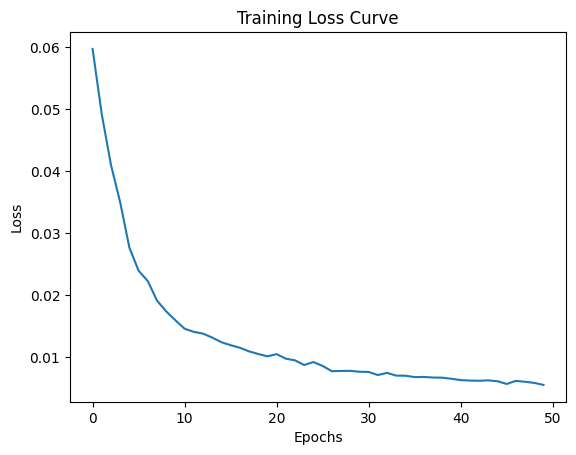

Test Loss (MSE): 0.0035


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 🎯 Select Features and Target
features = ['x', 'y', 'pass_end_x', 'pass_end_y', 'pass_angle', 'pass_length',
            'under_pressure', 'pass_direction', 'pca_0', 'pca_1', 'pca_2', 'pass_cluster']
target = ['pseudo_xA']

X = df_final[features].values
y = df_final[target].values

# 🎯 Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🎯 Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 🎯 Define FCNN Model
class FCNN(nn.Module):
    def __init__(self, input_size):
        super(FCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),

            nn.Linear(32, 16),
            nn.ReLU(),

            nn.Linear(16, 1)  # Output Layer (Regression)
        )

    def forward(self, x):
        return self.model(x)

# 🎯 Initialize Model
input_dim = X_train.shape[1]  # Number of features
model = FCNN(input_dim)

# 🎯 Loss and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error for Regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 🎯 Training Loop
epochs = 50
losses = []

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 🎯 Plot Training Loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# 🎯 Evaluate Model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor).item()

print(f"Test Loss (MSE): {test_loss:.4f}")


In [16]:

def preprocess_test_df(test_df, encoder, test_scaler, pca, dbscan):
    test_df['pass_technique'].fillna('Normal', inplace=True)
    test_df['pass_type'].fillna('Open Play', inplace=True)
    test_df['under_pressure'].fillna(False, inplace=True)

    test_df['pass_direction'] = np.arctan2(test_df['pass_end_y'] - test_df['y'],
                                           test_df['pass_end_x'] - test_df['x'])

    # Selecting only the relevant features (excluding 'target_xg')
    selected_features = ['x', 'y', 'pass_end_x', 'pass_end_y', 'pass_angle', 'pass_length',
                         'under_pressure', 'pass_technique', 'pass_type', 'play_pattern', 'pass_direction']

    test_df = test_df[selected_features]

    # Encoding categorical features
    categorical_features = ['pass_technique', 'pass_type', 'play_pattern']
    encoded_df = encoder.transform(test_df[categorical_features])

    # Converting encoded categorical features into DataFrame
    encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(categorical_features), index=test_df.index)

    # Dropping original categorical columns and concatenating encoded ones
    test_df = test_df.drop(columns=categorical_features).reset_index(drop=True)
    encoded_df = encoded_df.reset_index(drop=True)
    test_df = pd.concat([test_df, encoded_df], axis=1)

    # Using test-time scaler instead of the training scaler
    test_df_scaled = test_scaler.transform(test_df)

    # Applying PCA
    test_df_pca = pca.transform(test_df_scaled)

    # Clustering using DBSCAN
    test_df['cluster'] = dbscan.fit_predict(test_df_pca)

    return test_df




In [20]:
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

In [21]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

ModuleNotFoundError: No module named 'statsbombpy'

In [16]:
bundesliga_2016_matches= sb.matches(competition_id=9, season_id=27)
team="Bayern Munich"

#filter for only matches that the focus team played in
matches_df = bundesliga_2016_matches[(bundesliga_2016_matches['home_team'] == team)|(bundesliga_2016_matches['away_team'] == team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)
latest_match_id = matches_df.match_id.iloc[0]
events_df = sb.events(match_id=latest_match_id)

In [17]:
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

In [18]:
# Filter passes that led to a shot
passes_with_shots = events_df[events_df['pass_shot_assist'] == True]

# Filter by player "abc"
passes_with_shots = passes_with_shots[passes_with_shots['player'] == "Franck Bilal Ribéry"]

# Select only the required columns for the model
required_columns = [
    'x', 'y', 'pass_end_x', 'pass_end_y', 'pass_angle', 'pass_length',
    'under_pressure', 'pass_technique', 'pass_type', 'play_pattern'
]

# Keep only necessary columns
filtered_df = passes_with_shots[required_columns]

# Display the final DataFrame
filtered_df.head()



,x,y,pass_end_x,pass_end_y,pass_angle,pass_length,under_pressure,pass_technique,pass_type,play_pattern
471,120.0,80.0,104.6,28.5,-1.861362,53.753230,NaN,Straight,Corner,From Corner
696,74.5,34.2,94.9,54.3,0.777991,28.638610,NaN,NaN,NaN,Regular Play
703,78.7,75.8,80.1,63.7,-1.455606,12.180722,NaN,NaN,NaN,From Counter
979,88.6,19.4,92.6,31.4,1.249046,12.649111,NaN,NaN,NaN,Regular Play
996,73.0,7.4,96.0,42.9,0.995908,42.299526,True,Through Ball,NaN,From Free Kick


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Step 1: Fill missing values
if 'pass_technique' in filtered_df.columns:
    filtered_df['pass_technique'].fillna('Normal', inplace=True)
if 'pass_type' in filtered_df.columns:
    filtered_df['pass_type'].fillna('Open Play', inplace=True)
if 'under_pressure' in filtered_df.columns:
    filtered_df['under_pressure'].fillna(False, inplace=True)

print("\n🔹 After filling missing values:")
print(filtered_df.info(), "\n")

# Step 2: Compute pass_direction
if {'x', 'y', 'pass_end_x', 'pass_end_y'}.issubset(filtered_df.columns):
    filtered_df['pass_direction'] = np.arctan2(
        filtered_df['pass_end_y'] - filtered_df['y'],
        filtered_df['pass_end_x'] - filtered_df['x']
    )

print("\n🔹 After computing pass direction:")
print(filtered_df.columns, "\n")

# Step 3: Select only relevant features
selected_features = ['x', 'y', 'pass_end_x', 'pass_end_y', 'pass_angle',
                     'pass_length', 'under_pressure', 'pass_technique',
                     'pass_type', 'play_pattern', 'pass_direction']

filtered_df = filtered_df[[col for col in selected_features if col in filtered_df.columns]]

print("\n🔹 After selecting relevant features:")
print(filtered_df.columns, "\n")

# Step 4: Encoding categorical features
categorical_features = [col for col in ['pass_technique', 'pass_type', 'play_pattern'] if col in filtered_df.columns]

if categorical_features:
    encoded_df = pd.DataFrame(
        encoder.transform(filtered_df[categorical_features]),
        columns=encoder.get_feature_names_out(categorical_features),
        index=filtered_df.index
    )
    filtered_df = pd.concat([filtered_df.drop(columns=categorical_features), encoded_df], axis=1)

print("\n🔹 After encoding categorical features:")
print(filtered_df.columns, "\n")

# Step 5: Scaling
test_scaler = MinMaxScaler(feature_range=(0, 1))
test_scaler.fit(filtered_df)

try:
    filtered_df = pd.DataFrame(
        test_scaler.transform(filtered_df),
        columns=filtered_df.columns,
        index=filtered_df.index
    )
    print("\n✅ After scaling - Shape:", filtered_df.shape, "\n")
except ValueError as e:
    print("\n⚠️ Scaling failed! Error:", e)

# Step 6: Extract columns for PCA
pca_columns = [col for col in filtered_df.columns if col.startswith(('pass_technique_', 'pass_type_', 'play_pattern_'))]
pca_input = filtered_df[pca_columns]

print("\n🔹 Columns selected for PCA:")
print(pca_input.columns, "\n")

# Apply PCA (Reduce to 3 dimensions)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pca_input)

# Convert PCA output to DataFrame
pca_df = pd.DataFrame(pca_result, columns=['pca_0', 'pca_1', 'pca_2'], index=filtered_df.index)

print("\n✅ After PCA transformation - Shape:", pca_df.shape, "\n")

# Step 7: Remove original categorical encoding columns
filtered_df.drop(columns=pca_columns, inplace=True)

print("\n🔹 After removing PCA-transformed columns:")
print(filtered_df.columns, "\n")

# Step 8: Add PCA-transformed columns back to filtered_df
filtered_df = pd.concat([filtered_df, pca_df], axis=1)

print("\n🔹 After adding PCA-transformed columns:")
print(filtered_df.columns, "\n")

# Step 9: Apply DBSCAN clustering
filtered_df['cluster'] = dbscan.fit_predict(filtered_df)

print("\n✅ After DBSCAN clustering:")
print(filtered_df.columns, "\n")





<ipython-input-19-358d47fd3f70>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['pass_technique'].fillna('Normal', inplace=True)
<ipython-input-19-358d47fd3f70>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pass_technique'].fillna('Normal', inplace=True)
<ipython-input-19-358d47fd3f70>:10: FutureWarning: A value is


🔹 After filling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 471 to 1014
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               6 non-null      float64
 1   y               6 non-null      float64
 2   pass_end_x      6 non-null      float64
 3   pass_end_y      6 non-null      float64
 4   pass_angle      6 non-null      float64
 5   pass_length     6 non-null      float64
 6   under_pressure  6 non-null      bool   
 7   pass_technique  6 non-null      object 
 8   pass_type       6 non-null      object 
 9   play_pattern    6 non-null      object 
dtypes: bool(1), float64(6), object(3)
memory usage: 486.0+ bytes
None 


🔹 After computing pass direction:
Index(['x', 'y', 'pass_end_x', 'pass_end_y', 'pass_angle', 'pass_length',
       'under_pressure', 'pass_technique', 'pass_type', 'play_pattern',
       'pass_direction'],
      dtype='object') 


🔹 After selecting rel

In [ ]:
filtered_df

,x,y,pass_end_x,pass_end_y,pass_angle,pass_length,under_pressure,pass_direction,pca_0,pca_1,pca_2,cluster
471,1.000000,1.000000,0.847751,0.000000,0.000000,1.000000,0.0,0.000000,-1.774248,-0.636226,-0.053070,-1
696,0.031915,0.369146,0.512111,0.732955,0.707678,0.395884,0.0,0.707678,0.640043,-0.278653,-0.261253,-1
703,0.121277,0.942149,0.000000,1.000000,0.108794,0.000000,0.0,0.108794,0.289340,0.064801,1.065038,-1
979,0.331915,0.165289,0.432526,0.082386,0.833979,0.011267,0.0,0.833979,0.640043,-0.278653,-0.261253,-1
996,0.000000,0.000000,0.550173,0.409091,0.766107,0.724489,1.0,0.766107,-0.435222,1.407382,-0.228209,-1
1014,0.895745,0.205234,1.000000,0.389205,1.000000,0.207666,0.0,1.000000,0.640043,-0.278653,-0.261253,-1


In [20]:
import torch

# Step 3: Convert filtered_df to a PyTorch tensor
input_tensor = torch.tensor(filtered_df.values, dtype=torch.float32)

# Step 4: Pass the tensor through the model and get predictions
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    pseudo_xA_predictions = model(input_tensor).numpy()

# Step 5: Add predictions back to DataFrame
filtered_df['pseudo_xA'] = pseudo_xA_predictions

# Step 6: Print the output
print("\n✅ Predicted pseudo_xA values:")
print(filtered_df[['pseudo_xA']])


✅ Predicted pseudo_xA values:
      pseudo_xA
471    0.350340
696    0.289790
703    0.261159
979    0.288954
996    0.185023
1014   0.243033


In [ ]:
sum=0
for i in filtered_df['pseudo_xA']:
  float(i)
  sum=sum+i
print(sum)

2.259447753429413


In [21]:
import pandas as pd

# Get all matches Bayern Munich played in Bundesliga 2016
team = "Bayern Munich"
bundesliga_2016_matches = sb.matches(competition_id=9, season_id=27)

# Filter matches where Bayern Munich was either home or away
bayern_matches = bundesliga_2016_matches[
    (bundesliga_2016_matches['home_team'] == team) |
    (bundesliga_2016_matches['away_team'] == team)
]

# Extract match IDs for Bayern Munich
match_ids = bayern_matches['match_id'].tolist()

# Initialize an empty DataFrame
bayern_passes_with_shots = pd.DataFrame()

# Loop through each Bayern Munich match and extract passes leading to a shot
for match_id in match_ids:
    events_df = sb.events(match_id=match_id)

    # Extract pass events leading to a shot
    events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
    events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)

    passes_with_shots = events_df[events_df['pass_shot_assist'] == True]

    required_columns = [
        'match_id', 'player', 'team', 'x', 'y', 'pass_end_x', 'pass_end_y',
        'pass_angle', 'pass_length', 'under_pressure', 'pass_technique', 'pass_type', 'play_pattern'
    ]

    # Append to the final DataFrame
    bayern_passes_with_shots = pd.concat([bayern_passes_with_shots, passes_with_shots[required_columns]], ignore_index=True)

# Display the final DataFrame
bayern_passes_with_shots.head()


,match_id,player,team,x,y,pass_end_x,pass_end_y,pass_angle,pass_length,under_pressure,pass_technique,pass_type,play_pattern
0,3890505,Xabier Alonso Olano,Bayern Munich,89.2,17.1,109.4,44.0,0.926701,33.640007,NaN,NaN,NaN,Regular Play
1,3890505,Franck Bilal Ribéry,Bayern Munich,115.4,18.8,114.3,35.3,1.637364,16.536627,True,NaN,NaN,From Corner
2,3890505,Thomas Müller,Bayern Munich,97.3,44.4,95.2,40.6,-2.075658,4.341659,NaN,NaN,NaN,From Throw In
3,3890505,Xabier Alonso Olano,Bayern Munich,62.8,46.3,82.5,51.4,0.253322,20.349447,NaN,NaN,NaN,Regular Play
4,3890505,Thiago Alcântara do Nascimento,Bayern Munich,120.0,0.1,112.3,36.6,1.778707,37.303352,NaN,Straight,Corner,From Corner


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Copy the Bayern data to avoid modifying the original DataFrame
bayern_clustered_passes = bayern_passes_with_shots.copy()

# Step 1: Fill missing values
bayern_clustered_passes['pass_technique'].fillna('Normal', inplace=True)
bayern_clustered_passes['pass_type'].fillna('Open Play', inplace=True)
bayern_clustered_passes['under_pressure'].fillna(False, inplace=True)

# Step 2: Compute pass_direction
bayern_clustered_passes['pass_direction'] = np.arctan2(
    bayern_clustered_passes['pass_end_y'] - bayern_clustered_passes['y'],
    bayern_clustered_passes['pass_end_x'] - bayern_clustered_passes['x']
)

# Step 3: Preserve match_id and player columns, then select relevant features
match_ids = bayern_clustered_passes[['match_id']]  # Keep match_id safe
players = bayern_clustered_passes[['player']]  # Keep player safe

selected_features = ['x', 'y', 'pass_end_x', 'pass_end_y', 'pass_angle',
                     'pass_length', 'under_pressure', 'pass_technique',
                     'pass_type', 'play_pattern', 'pass_direction']

bayern_clustered_passes = bayern_clustered_passes[selected_features]

# Step 4: Encoding categorical features
categorical_features = ['pass_technique', 'pass_type', 'play_pattern']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(bayern_clustered_passes[categorical_features])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(categorical_features),
    index=bayern_clustered_passes.index
)

bayern_clustered_passes = pd.concat([bayern_clustered_passes.drop(columns=categorical_features), encoded_df], axis=1)

# Step 5: Scaling (Exclude match_id and player)
scaler = MinMaxScaler(feature_range=(0, 1))
bayern_clustered_passes[bayern_clustered_passes.columns] = scaler.fit_transform(bayern_clustered_passes)

# Step 6: PCA (Reduce to 3 dimensions)
pca_columns = encoded_df.columns.tolist()  # Only categorical encodings
pca = PCA(n_components=3)
pca_result = pca.fit_transform(bayern_clustered_passes[pca_columns])

pca_df = pd.DataFrame(pca_result, columns=['pca_0', 'pca_1', 'pca_2'], index=bayern_clustered_passes.index)
bayern_clustered_passes.drop(columns=pca_columns, inplace=True)
bayern_clustered_passes = pd.concat([bayern_clustered_passes, pca_df], axis=1)

# Step 7: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
bayern_clustered_passes['cluster'] = dbscan.fit_predict(bayern_clustered_passes)

# Step 8: Add match_id and player back
bayern_clustered_passes = pd.concat([match_ids, players, bayern_clustered_passes], axis=1)

# Display final dataframe
print("\n✅ Final DataFrame with match_id, player, and clustering:")
print(bayern_clustered_passes.head())



✅ Final DataFrame with match_id, player, and clustering:
   match_id                          player         x         y  pass_end_x  \
0   3890505             Xabier Alonso Olano  0.707780  0.212766    0.887743   
1   3890505             Franck Bilal Ribéry  0.956357  0.234043    0.943872   
2   3890505                   Thomas Müller  0.784630  0.554443    0.725086   
3   3890505             Xabier Alonso Olano  0.457306  0.578223    0.579611   
4   3890505  Thiago Alcântara do Nascimento  1.000000  0.000000    0.920962   

   pass_end_y  pass_angle  pass_length  under_pressure  pass_direction  \
0    0.549933    0.648284     0.458713             0.0        0.648284   
1    0.434088    0.762676     0.217085             1.0        0.762676   
2    0.504660    0.165011     0.044801             0.0        0.165011   
3    0.648469    0.539894     0.270951             0.0        0.539894   
4    0.451398    0.785427     0.510467             0.0        0.785427   

      pca_0     pca_1 

<ipython-input-28-6837c98baf44>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bayern_clustered_passes['pass_technique'].fillna('Normal', inplace=True)
<ipython-input-28-6837c98baf44>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [29]:
import torch

# Step 1: Separate match_id and player before converting to tensor
match_ids = bayern_clustered_passes[['match_id']]  # Keep match_id safe
players = bayern_clustered_passes[['player']]  # Keep player safe
input_features = bayern_clustered_passes.drop(columns=['match_id', 'player'])  # Drop match_id and player

# Step 2: Convert input features to PyTorch tensor
input_tensor = torch.tensor(input_features.values, dtype=torch.float32)

# Step 3: Pass the tensor through the model and get predictions
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    pseudo_xA_predictions = model(input_tensor).numpy()

# Step 4: Add predictions back to DataFrame
bayern_clustered_passes = pd.concat([match_ids, players, input_features], axis=1)  # Restore match_id and player
bayern_clustered_passes['pseudo_xA'] = pseudo_xA_predictions  # Add predictions

# Step 5: Print the output
print("\n✅ Predicted pseudo_xA values:")
print(bayern_clustered_passes[['match_id', 'player', 'pseudo_xA']])



✅ Predicted pseudo_xA values:
     match_id                           player  pseudo_xA
0     3890505              Xabier Alonso Olano   0.213637
1     3890505              Franck Bilal Ribéry   0.175057
2     3890505                    Thomas Müller   0.329079
3     3890505              Xabier Alonso Olano   0.177982
4     3890505   Thiago Alcântara do Nascimento   0.160300
..        ...                              ...        ...
584   3890259                       Ivica Olić   0.239706
585   3890259  Márcio Rafael Ferreira de Souza   0.196458
586   3890259        Arturo Erasmo Vidal Pardo   0.176307
587   3890259   Thiago Alcântara do Nascimento   0.244769
588   3890259           Douglas Costa de Souza   0.125269

[589 rows x 3 columns]


In [30]:
# Step 1: Group by match_id and player, then sum the pseudo_xA values
player_xA_per_match = (
    bayern_clustered_passes.groupby(['match_id', 'player'])['pseudo_xA']
    .sum()
    .reset_index()
    .rename(columns={'pseudo_xA': 'total_xA'})
)

# Step 2: Print the results
print("\n✅ Accumulative xA per player per match:")
print(player_xA_per_match)
player_xA_per_match.head(5)



✅ Accumulative xA per player per match:
     match_id                           player  total_xA
0     3890259                     Arjen Robben  0.193971
1     3890259        Arturo Erasmo Vidal Pardo  0.768521
2     3890259           David Olatukunbo Alaba  0.473716
3     3890259           Douglas Costa de Souza  0.310916
4     3890259                       Ivica Olić  0.239706
..        ...                              ...       ...
337   3890559  Medhi Amine El Mouttaqi Benatia  0.238147
338   3890559      Miiko Martín Albornoz Inola  0.594595
339   3890559                     Philipp Lahm  0.304503
340   3890559               Robert Lewandowski  0.197205
341   3890559   Thiago Alcântara do Nascimento  0.434628

[342 rows x 3 columns]


,match_id,player,total_xA
0,3890259,Arjen Robben,0.193971
1,3890259,Arturo Erasmo Vidal Pardo,0.768521
2,3890259,David Olatukunbo Alaba,0.473716
3,3890259,Douglas Costa de Souza,0.310916
4,3890259,Ivica Olić,0.239706


In [31]:
# Step 1: Group by player and sum the pseudo_xA across all matches (season total)
total_xA_per_player = (
    bayern_clustered_passes.groupby('player')['pseudo_xA']
    .sum()
    .reset_index()
    .rename(columns={'pseudo_xA': 'season_total_xA'})
)

# Step 2: Sort by highest xA
total_xA_per_player = total_xA_per_player.sort_values(by='season_total_xA', ascending=False)

# Step 3: Print results
print("\n📊 Total xA for each player across the season:")
print(total_xA_per_player)



📊 Total xA for each player across the season:
                        player  season_total_xA
107              Thomas Müller        13.435687
89                Philipp Lahm        10.660418
8    Arturo Erasmo Vidal Pardo         9.041283
24      Douglas Costa de Souza         7.700379
58              Kingsley Coman         7.221157
..                         ...              ...
68               Marc Stendera         0.094021
32          Florian Grillitsch         0.054279
35            Hakan Çalhanoğlu         0.051087
92            Piotr Trochowski         0.047807
62              Leon Andreasen         0.045508

[121 rows x 2 columns]


In [45]:
from tqdm import tqdm  # optional: for progress bar
from statsbombpy import sb
import pandas as pd

# Get all Bundesliga 2016 matches
bundesliga_2016_matches = sb.matches(competition_id=9, season_id=27)
team = "Bayern Munich"

# Filter to only Bayern Munich matches
matches_df = bundesliga_2016_matches[
    (bundesliga_2016_matches['home_team'] == team) |
    (bundesliga_2016_matches['away_team'] == team)
].sort_values(by='match_date', ascending=False)

# Add match name column (e.g., "Bayern Munich vs Borussia Dortmund")
matches_df["match_name"] = matches_df["home_team"] + " vs " + matches_df["away_team"]

# Fetch all events and combine into one dataframe
events_list = []
for match_id in tqdm(matches_df['match_id'], desc="Fetching events"):
    match_events = sb.events(match_id=match_id)
    match_events['match_id'] = match_id  # add match_id column for tracking
    events_list.append(match_events)

# Combine all match events into one DataFrame
events_df = pd.concat(events_list, ignore_index=True)

# Merge match_name into events_df
events_df = events_df.merge(matches_df[['match_id', 'match_name']], on='match_id', how='left')


Fetching events: 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]


In [46]:
print(events_df['match_id'].nunique())
print(events_df[events_df['team'] == 'Bayern Munich']['match_id'].unique())


34
[3890559 3890548 3890541 3890533 3890526 3890516 3890505 3890495 3890489
 3890481 3890474 3890458 3890453 3890446 3890431 3890428 3890412 3890407
 3890399 3890387 3890378 3890369 3890364 3890349 3890341 3890332 3890329
 3890316 3890305 3890296 3890287 3890278 3890270 3890259]


In [47]:
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

In [48]:
print(events_df.columns)

Index(['ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       ...
       'shot_saved_to_post', 'shot_redirect', 'shot_open_goal', 'match_name',
       'x', 'y', 'pass_end_x', 'pass_end_y', 'carry_end_x', 'carry_end_y'],
      dtype='object', length=117)


In [49]:
events_df[[
    'shot_statsbomb_xg', 'shot_outcome', 'pass_goal_assist', 'pass_through_ball', 'pass_outcome',
    'pass_cross', 'dribble_outcome', 'interception_outcome', 'duel_outcome',
    'clearance_aerial_won', 'foul_committed_advantage', 'foul_won_advantage', 'foul_won_defensive',
    'foul_committed_card', 'goalkeeper_outcome', 'goalkeeper_technique', 'goalkeeper_type'
]].dtypes


,0
shot_statsbomb_xg,float64
shot_outcome,object
pass_goal_assist,object
pass_through_ball,object
pass_outcome,object
pass_cross,object
dribble_outcome,object
interception_outcome,object
duel_outcome,object
clearance_aerial_won,object


In [50]:
events_df_backup = events_df.copy()  # Create a full backup


In [51]:
binary_cols = [
    'pass_goal_assist', 'pass_through_ball', 'pass_cross',
    'clearance_aerial_won', 'foul_committed_advantage',
    'foul_won_advantage', 'foul_won_defensive'
]

for col in binary_cols:
    events_df[col] = events_df[col].fillna(0).astype(int)  # NaN → 0, True → 1


In [52]:
mapping = {
    'pass_outcome': {'Incomplete': -1, 'Out': -1, 'Unknown': 0, 'Pass Offside': -1},  # Unsuccessful passes
    'foul_committed_card': {'Yellow Card': -2},  # Negative impact
    'duel_outcome': {'Lost Out': -2, 'Lost In Play': -1, 'Success In Play': 1, 'Won': 2},
    'interception_outcome': {'Lost In Play': -1, 'Success In Play': 2, 'Won': 3},
    'dribble_outcome': {'Incomplete': -2, 'Complete': 2},
    'goalkeeper_type':{'Shot Faced': 1,'Shot Saved': 3,'Goal Conceded': -2,'Punch': 2,},
    'goalkeeper_outcome': {'No Touch': 0, 'Touched Out': 1, 'In Play Safe': 2, 'In Play Danger': -1, 'Success': 3},
    'goalkeeper_technique': {'Standing': 1, 'Diving': 2},
    'shot_outcome': {'Goal': 1}
}

for col, map_dict in mapping.items():
    if col in events_df.columns and col != 'pass_outcome':  # Avoid remapping pass_outcome
        events_df[col] = events_df[col].map(map_dict)

# Successful passes: NaN values in pass_outcome
events_df['successful_passes'] = events_df['pass_outcome'].isna().astype(int)

# Unsuccessful passes: Only mapped failure cases
events_df['unsuccessful_passes'] = events_df['pass_outcome'].map({'Incomplete': 1, 'Out': 1, 'Pass Offside': 1}).fillna(0).astype(int)


In [53]:
selected_columns = [
    'shot_statsbomb_xg', 'shot_outcome', 'pass_goal_assist', 'pass_through_ball',
    'pass_cross', 'dribble_outcome', 'interception_outcome', 'duel_outcome',
    'clearance_aerial_won', 'foul_committed_advantage', 'foul_won_advantage',
    'foul_won_defensive', 'foul_committed_card', 'goalkeeper_outcome',
    'goalkeeper_technique', 'goalkeeper_type', 'match_id',
    'successful_passes', 'unsuccessful_passes'
]

# Make sure events_df is not pre-filtered to a specific match
# Extract all Bayern events across all matches
bayern_events = events_df[(events_df['team'] == 'Bayern Munich')][selected_columns + ['player']]

# Ensure player_xA_per_match includes all relevant match_id + player + total_xA combinations
# (Assuming it's already computed over the full season — if not, you'll need to aggregate over full events_df)

# Merge xA values
bayern_df = bayern_events.merge(
    player_xA_per_match[['match_id', 'player', 'total_xA']],
    on=['match_id', 'player'],
    how='left'
)

# Fill missing xA with 0
bayern_df['total_xA'].fillna(0, inplace=True)

bayern_df = bayern_df.merge(
    matches_df[['match_id', 'match_name']],
    on='match_id',
    how='left'
)

# Display the number of unique matches and players to confirm
print(f"Number of Bayern matches: {bayern_df['match_id'].nunique()}")
print(f"Number of Bayern players: {bayern_df['player'].nunique()}")


Number of Bayern matches: 34
Number of Bayern players: 25


<ipython-input-53-2eea6a8f06f1>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bayern_df['total_xA'].fillna(0, inplace=True)


In [54]:
bayern_df.head(20)

,shot_statsbomb_xg,shot_outcome,pass_goal_assist,pass_through_ball,pass_cross,dribble_outcome,interception_outcome,duel_outcome,clearance_aerial_won,foul_committed_advantage,...,foul_committed_card,goalkeeper_outcome,goalkeeper_technique,goalkeeper_type,match_id,successful_passes,unsuccessful_passes,player,total_xA,match_name
0,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,1,0,NaN,0.000000,Bayern Munich vs Hannover 96
1,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,1,0,NaN,0.000000,Bayern Munich vs Hannover 96
2,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,1,0,NaN,0.000000,Bayern Munich vs Hannover 96
3,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,0,1,Thiago Alcântara do Nascimento,0.434628,Bayern Munich vs Hannover 96
4,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,1,0,Manuel Neuer,0.000000,Bayern Munich vs Hannover 96
5,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,1,0,Medhi Amine El Mouttaqi Benatia,0.238147,Bayern Munich vs Hannover 96
6,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,1,0,Manuel Neuer,0.000000,Bayern Munich vs Hannover 96
7,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,0,1,Jérôme Boateng,0.224047,Bayern Munich vs Hannover 96
8,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,1,0,Franck Bilal Ribéry,1.106619,Bayern Munich vs Hannover 96
9,NaN,NaN,0,0,0,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,3890559,1,0,Arturo Erasmo Vidal Pardo,0.305359,Bayern Munich vs Hannover 96


In [57]:
columns_to_sum = [
    'shot_statsbomb_xg', 'shot_outcome', 'pass_goal_assist', 'pass_through_ball',
    'pass_cross', 'dribble_outcome', 'interception_outcome', 'duel_outcome',
    'clearance_aerial_won', 'foul_committed_advantage', 'foul_won_advantage',
    'foul_won_defensive', 'foul_committed_card', 'goalkeeper_outcome',
    'goalkeeper_technique', 'goalkeeper_type', 'successful_passes', 'unsuccessful_passes'  # Added these
]

bayern_match_summary = bayern_df.groupby(['match_id','match_name', 'player','total_xA'], as_index=False)[columns_to_sum].sum()


In [58]:
bayern_match_summary.head(100)

,match_id,match_name,player,total_xA,shot_statsbomb_xg,shot_outcome,pass_goal_assist,pass_through_ball,pass_cross,dribble_outcome,...,clearance_aerial_won,foul_committed_advantage,foul_won_advantage,foul_won_defensive,foul_committed_card,goalkeeper_outcome,goalkeeper_technique,goalkeeper_type,successful_passes,unsuccessful_passes
0,3890259,Bayern Munich vs Hamburger SV,Arjen Robben,0.193971,0.108922,0.0,0,0,0,-4.0,...,0,0,0,0,0.0,0.0,0.0,0.0,136,6
1,3890259,Bayern Munich vs Hamburger SV,Arturo Erasmo Vidal Pardo,0.768521,0.125753,0.0,0,0,0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,371,7
2,3890259,Bayern Munich vs Hamburger SV,David Olatukunbo Alaba,0.473716,0.129779,0.0,0,1,3,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,224,7
3,3890259,Bayern Munich vs Hamburger SV,Douglas Costa de Souza,0.310916,0.115056,1.0,1,0,4,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,225,11
4,3890259,Bayern Munich vs Hamburger SV,Jérôme Boateng,0.000000,0.170743,0.0,0,0,1,0.0,...,2,0,0,0,-2.0,0.0,0.0,0.0,264,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3890316,FSV Mainz 05 vs Bayern Munich,Thomas Müller,0.597277,0.875704,0.0,0,1,0,-4.0,...,0,0,0,1,0.0,0.0,0.0,0.0,108,6
96,3890316,FSV Mainz 05 vs Bayern Munich,Xabier Alonso Olano,0.000000,0.000000,0.0,0,0,0,0.0,...,0,0,0,3,-2.0,0.0,0.0,0.0,219,9
97,3890329,Bayern Munich vs Borussia Dortmund,Arturo Erasmo Vidal Pardo,0.000000,0.082852,0.0,0,0,0,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,53,5
98,3890329,Bayern Munich vs Borussia Dortmund,David Olatukunbo Alaba,0.000000,0.000000,0.0,0,0,3,0.0,...,0,0,0,0,-2.0,0.0,0.0,0.0,202,8


In [59]:
from scipy.stats import norm

# Calculate pass ratio
bayern_match_summary['pass_ratio'] = bayern_match_summary['successful_passes'] / (
    bayern_match_summary['successful_passes'] + bayern_match_summary['unsuccessful_passes']
)

# Replace NaN (0/0) with 0
bayern_match_summary['pass_ratio'] = bayern_match_summary['pass_ratio'].fillna(0)

# Calculate raw ratings with pass ratio
bayern_match_summary['raw_rating'] = (
    bayern_match_summary['shot_statsbomb_xg'] * 4 +
    bayern_match_summary['total_xA'] * 3 +
    bayern_match_summary['shot_outcome'] * 6 +
    bayern_match_summary['pass_goal_assist'] * 5 +
    bayern_match_summary['pass_through_ball'] * 2 +
    bayern_match_summary['pass_cross'] * 1 +
    bayern_match_summary['dribble_outcome'] * 1.5 +
    bayern_match_summary['interception_outcome'] * 2 +
    bayern_match_summary['duel_outcome'] * 1 +
    bayern_match_summary['clearance_aerial_won'] * 1.5 +
    bayern_match_summary['foul_committed_advantage'] * -1 +
    bayern_match_summary['foul_won_advantage'] * 1 +
    bayern_match_summary['foul_won_defensive'] * 1 +
    bayern_match_summary['foul_committed_card'] * -4 +
    bayern_match_summary['pass_ratio'] * 3 +
    bayern_match_summary['goalkeeper_type'] +
    bayern_match_summary['goalkeeper_outcome'] +
    bayern_match_summary['goalkeeper_technique']
)


# Standardize using Z-score
mean_rating = bayern_match_summary['raw_rating'].mean()
std_rating = bayern_match_summary['raw_rating'].std()
bayern_match_summary['z_score'] = (bayern_match_summary['raw_rating'] - mean_rating) / std_rating

# Clip extreme negative values
bayern_match_summary['z_score'] = bayern_match_summary['z_score'].clip(lower=-1.5)

# Convert Z-score to 6-10 range
bayern_match_summary['player_rating'] = norm.cdf(bayern_match_summary['z_score']) * 4 + 6

# Final ratings DataFrame
final_ratings_df = bayern_match_summary[['match_id','match_name', 'player', 'player_rating']]

# Display top 20 ratings
final_ratings_df.head(20)


,match_id,match_name,player,player_rating
0,3890259,Bayern Munich vs Hamburger SV,Arjen Robben,6.267229
1,3890259,Bayern Munich vs Hamburger SV,Arturo Erasmo Vidal Pardo,6.805152
2,3890259,Bayern Munich vs Hamburger SV,David Olatukunbo Alaba,7.397908
3,3890259,Bayern Munich vs Hamburger SV,Douglas Costa de Souza,9.537098
4,3890259,Bayern Munich vs Hamburger SV,Jérôme Boateng,8.547513
5,3890259,Bayern Munich vs Hamburger SV,Manuel Neuer,8.277941
6,3890259,Bayern Munich vs Hamburger SV,Mario Götze,7.929585
7,3890259,Bayern Munich vs Hamburger SV,Medhi Amine El Mouttaqi Benatia,8.990421
8,3890259,Bayern Munich vs Hamburger SV,Márcio Rafael Ferreira de Souza,7.103768
9,3890259,Bayern Munich vs Hamburger SV,Philipp Lahm,7.845528


In [60]:
!pip install streamlit pyngrok --quiet



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 453.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [61]:
from pyngrok import ngrok

ngrok.set_auth_token("2k8nltS4taNUytDww3vZ2qzmxnk_3GCKNz6Hk8PzVyFiwPkT5")


In [62]:
final_ratings_df.to_csv("final_ratings.csv", index=False)


In [ ]:
# Step 1: Clean up any broken installs
!pip uninstall -y duckduckgo-search
!pip install duckduckgo-search==0.9 -q
import os
import requests
from duckduckgo_search import DDGS

# Player list
players = [
    "Robert Lewandowski", "Thomas Müller", "Joshua Kimmich", "Manuel Neuer", "Serge Gnabry", "Leon Goretzka",
    "Arjen Robben", "Arturo Erasmo Vidal Pardo", "David Olatukunbo Alaba", "Douglas Costa de Souza",
    "Jérôme Boateng", "Mario Götze", "Medhi Amine El Mouttaqi Benatia", "Márcio Rafael Ferreira de Souza",
    "Philipp Lahm", "Thiago Alcântara do Nascimento", "Xabier Alonso Olano", "Dante Bonfim da Costa Santos",
    "Juan Bernat Velasco", "Sebastian Rode", "Kingsley Coman", "Javier Martínez Aginaga", "Miloš Pantović",
    "Holger Badstuber", "Franck Bilal Ribéry", "Serdar Taşçı", "Sven Ulreich"
]

# Create folder
os.makedirs("player_images", exist_ok=True)

# Filename sanitizer
def sanitize(name):
    return name.lower().replace(" ", "_") \
        .replace("ö", "oe").replace("ü", "ue").replace("ß", "ss") \
        .replace("é", "e").replace("è", "e").replace("ó", "o") \
        .replace("ã", "a").replace("ç", "c").replace("í", "i") \
        .replace("ş", "s").replace("ğ", "g").replace("á", "a") \
        .replace("â", "a").replace("ñ", "n").replace("ý", "y") \
        .replace("č", "c").replace("Ž", "z").replace("ž", "z")

# Search & download images
with DDGS() as ddgs:
    for player in players:
        try:
            results = ddgs.images(player + " footballer", max_results=1)
            for result in results:
                url = result["image"]
                filename = f"player_images/{sanitize(player)}.jpg"
                r = requests.get(url)
                with open(filename, "wb") as f:
                    f.write(r.content)
                print(f"✅ Downloaded: {player}")
                break
        except Exception as e:
            print(f"❌ Failed for {player}: {e}")


In [91]:
%%writefile app.py
import streamlit as st
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

st.set_page_config(page_title="⚽ Player Ratings Dashboard", layout="wide")

# Load data
df = pd.read_csv("final_ratings.csv")
bayern_match_summary = pd.read_csv("bayern_match_summary.csv")

# Round player_rating to 1 decimal place
df['player_rating'] = df['player_rating'].round(1)

# Sidebar filters
with st.sidebar:
    st.title("⚙️ Filters")
    player = st.selectbox("Select a Player", df['player'].unique())

    # Get match name mapping
    player_matches_df = df[df['player'] == player][['match_id', 'match_name']].drop_duplicates()
    match_name_to_id = dict(zip(player_matches_df['match_name'], player_matches_df['match_id']))
    selected_match_name = st.selectbox("Select a Match", player_matches_df['match_name'].values)

    match_id = match_name_to_id[selected_match_name]

    min_rating = st.slider("Minimum Rating", 0.0, 10.0, 5.0)
    st.markdown("---")

# Filtered data
filtered = df[(df['player'] == player) & (df['match_id'] == match_id) & (df['player_rating'] >= min_rating)]
player_match_stats = bayern_match_summary[(bayern_match_summary['player'] == player) &
                                          (bayern_match_summary['match_id'] == match_id)]


def load_player_image(player_name):
    if player_name == "Robert Lewandowski":
        image_path = "/content/player_images/robert_lewandowski.jpg"
    elif player_name == "Thomas Müller":
        image_path = "/content/player_images/thomas_mueller.jpg"
    elif player_name == "Manuel Neuer":
        image_path = "/content/player_images/manuel_neuer.jpg"
    elif player_name == "Arjen Robben":
        image_path = "/content/player_images/arjen_robben.jpg"
    elif player_name == "Arturo Erasmo Vidal Pardo":
        image_path = "/content/player_images/arturo_erasmo_vidal_pardo.jpg"
    elif player_name == "David Olatukunbo Alaba":
        image_path = "/content/player_images/david_olatukunbo_alaba.jpg"
    elif player_name == "Douglas Costa de Souza":
        image_path = "/content/player_images/douglas_costa_de_souza.jpg"
    elif player_name == "Jérôme Boateng":
        image_path = "/content/player_images/jerôme_boateng.jpg"
    elif player_name == "Joshua Kimmich":
        image_path = "/content/player_images/Joshua_Kimmich.jpg"
    elif player_name == "Mario Götze":
        image_path = "/content/player_images/mario_goetze.jpg"
    elif player_name == "Medhi Amine El Mouttaqi Benatia":
        image_path = "/content/player_images/medhi_amine_el_mouttaqi_benatia.jpg"
    elif player_name == "Márcio Rafael Ferreira de Souza":
        image_path = "/content/player_images/marcio_rafael_ferreira_de_souza.jpg"
    elif player_name == "Philipp Lahm":
        image_path = "/content/player_images/philipp_lahm.jpg"
    elif player_name == "Thiago Alcântara do Nascimento":
        image_path = "/content/player_images/thiago_alcantara_do_nascimento.jpg"
    elif player_name == "Xabier Alonso Olano":
        image_path = "/content/player_images/xabier_alonso_olano.jpg"
    elif player_name == "Dante Bonfim da Costa Santos":
        image_path = "/content/player_images/dante_bonfim_da_costa_santos.jpg"
    elif player_name == "Juan Bernat Velasco":
        image_path = "/content/player_images/juan_bernat_velasco.jpg"
    elif player_name == "Sebastian Rode":
        image_path = "/content/player_images/sebastian_rode.jpg"
    elif player_name == "Kingsley Coman":
        image_path = "/content/player_images/kingsley_coman.jpg"
    elif player_name == "Javier Martínez Aginaga":
        image_path = "/content/player_images/javier_martinez_aginaga.jpg"
    elif player_name == "Miloš Pantović":
        image_path = "/content/player_images/miloš_pantović.jpg"
    elif player_name == "Holger Badstuber":
        image_path = "/content/player_images/holger_badstuber.jpg"
    elif player_name == "Franck Bilal Ribéry":
        image_path = "/content/player_images/franck_bilal_ribery.jpg"
    elif player_name == "Serdar Taşçı":
        image_path = "/content/player_images/serdar_tascı.jpg"
    elif player_name == "Sven Ulreich":
        image_path = "/content/player_images/sven_ulreich.jpg"
    else:
        return None

    if os.path.exists(image_path):
        return Image.open(image_path)
    return None

# Altair bar chart function
def plot_altair_chart(player_df, player_name):
    metrics = ['shot_statsbomb_xg','total_xA','shot_outcome', 'pass_goal_assist', 'pass_through_ball',
               'pass_cross', 'dribble_outcome', 'interception_outcome',
               'duel_outcome', 'clearance_aerial_won']

    player_stats = player_df[player_df['player'] == player_name]
    if player_stats.empty:
        st.warning(f"No data found for {player_name}.")
        return

    avg_stats = player_stats[metrics].mean().reset_index()
    avg_stats.columns = ['Metric', 'Value']

    chart = alt.Chart(avg_stats).mark_bar(color='crimson').encode(
        x=alt.X('Value:Q', title='Metric Value'),
        y=alt.Y('Metric:N', sort='-x', title=''),
        tooltip=['Metric', 'Value']
    ).properties(
        title=f'{player_name} - Performance Metrics',
        height=400
    )
    st.altair_chart(chart, use_container_width=True)

# Main page
st.title("🏟️ Player Ratings Dashboard")

# Tabs (SWAPPED order)
tab1, tab2, tab3 = st.tabs(["📋 Player Match Info", "📈 Player Metrics", "📊 Rating Insights"])

with tab1:
    st.subheader(f"{player} - {selected_match_name}")

    # Show image for Robert Lewandowski
    player_image = load_player_image(player)
    if player_image:
        st.image(player_image, caption=player, width=150)

    st.write("**Match Rating Info**")
    st.dataframe(
        filtered.style.format({'player_rating': '{:.1f}'}).background_gradient(cmap="YlGnBu"),
        use_container_width=True
    )

    st.write("**Detailed Stats**")
    if not player_match_stats.empty:
        st.dataframe(player_match_stats.drop(columns=['player', 'match_id']).T.rename(columns={player_match_stats.index[0]: "Value"}), use_container_width=True)
    else:
        st.warning("No detailed stats available for this match.")

with tab2:
    st.subheader("Player Match Metrics")
    plot_altair_chart(player_match_stats, player)

with tab3:
    st.subheader("Rating Distribution")
    chart = alt.Chart(df).mark_bar(color='steelblue').encode(
        x=alt.X('player_rating:Q', bin=alt.Bin(maxbins=20), title='Final Rating'),
        y=alt.Y('count():Q', title='Count'),
        tooltip=['count()']
    ).properties(height=400)
    st.altair_chart(chart, use_container_width=True)


Overwriting app.py


In [64]:
bayern_match_summary.to_csv("bayern_match_summary.csv", index=False)

In [92]:
import os
from pyngrok import ngrok

# Set your ngrok authtoken first (only once)
ngrok.set_auth_token("2k8nltS4taNUytDww3vZ2qzmxnk_3GCKNz6Hk8PzVyFiwPkT5")

# Kill previous tunnels
ngrok.kill()

# Start a tunnel
public_url = ngrok.connect(8501)
print("🌐 Your Streamlit app is live at:", public_url)

# Launch Streamlit
!streamlit run app.py &>/dev/null &


🌐 Your Streamlit app is live at: NgrokTunnel: "https://74f6-34-58-54-144.ngrok-free.app" -> "http://localhost:8501"
